In [ ]:
## Import Necessary Packages
%pip install pandas matplotlib

import pandas as pd

%pip install matplotlib

import matplotlib.pyplot as plt

%pip install seaborn

import seaborn as sns

%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jenna\.cache\kagglehub\datasets\johnsmith88\heart-disease-dataset\versions\2


Here I am preparing the data which includes importing the set, testing variables for correlation, and researching what may be indicators for heart disease. Based on some research, exercise induced angina, or chest pain when exercising, can be an indicator of heart disease alongside other factors that seem to have a higher risk of heart disease such as age and gender.

Per this link https://www.kaggle.com/datasets/mexwell/heart-disease-dataset, the meaning of each value is as follows:

Sex: 
0 = female 
1 = male

Chest Pain Type:
1 = Typical Angina
2 = Atypical Angina
3 = Non-Anginal Pain
4 = Asymptomatic

Fasting Blood Sugar (>120 mg/dl):
0 = False
1 = True

Maximum Heart Rate ("thalach")

Resting Electrocardiogram Results:
0 = Normal
1 = Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2 = Showing probable or definite left ventricular hypertrophy by Estes' criteria

Exercised Induced Angina (column name exang):
0 = No
1 = Yes

The Slope of the Peak Exercise ST Segment (# oldpeak):
1 = Upsloping
2 = Flat
3 = Downsloping

Class (column name target):
0 = Normal
1 = Heart Disease

In [2]:
# preparing data 

df = pd.read_csv('C:/Users/jenna/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2/heart.csv')

df_unique = df.drop_duplicates()
df_unique.head()

diseased_nondiseased_counts = df_unique['target'].value_counts()
print(diseased_nondiseased_counts)

target
1    164
0    138
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

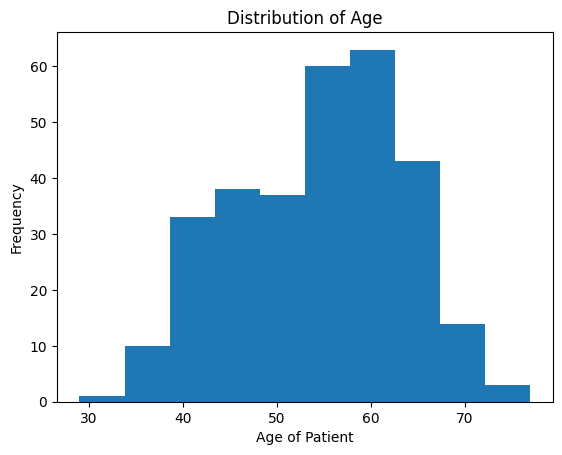

In [3]:
# visualizations 

#put age histogram here to show normal distribution with a right lean
plt.hist(df_unique['age'], bins=10) 
plt.title('Distribution of Age')
plt.xlabel('Age of Patient')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

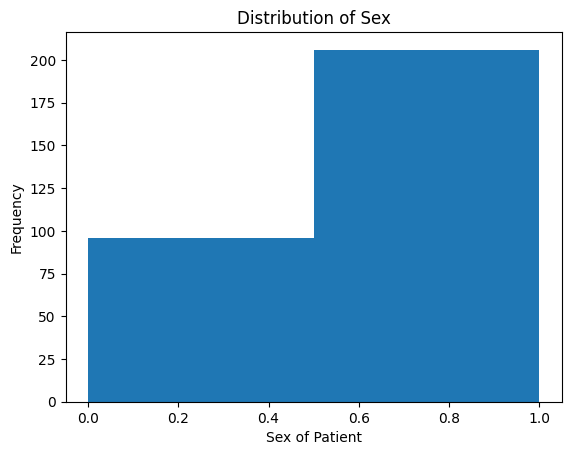

In [4]:
# sex histogram
plt.hist(df_unique['sex'], bins=2) 
plt.title('Distribution of Sex')
plt.xlabel('Sex of Patient')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency of Each Type')

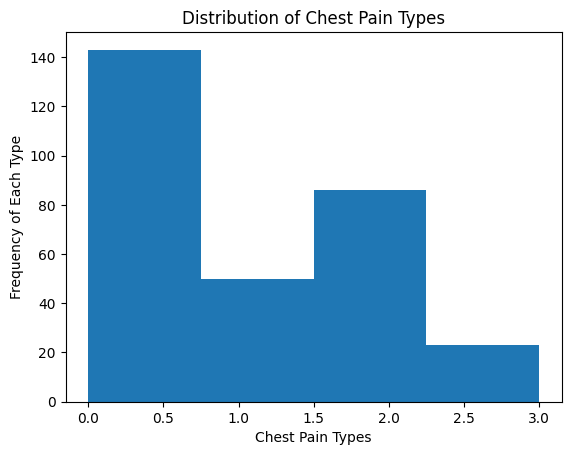

In [5]:
# chest pain type histogram
plt.hist(df_unique['cp'], bins=4) 
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Types')
plt.ylabel('Frequency of Each Type')

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

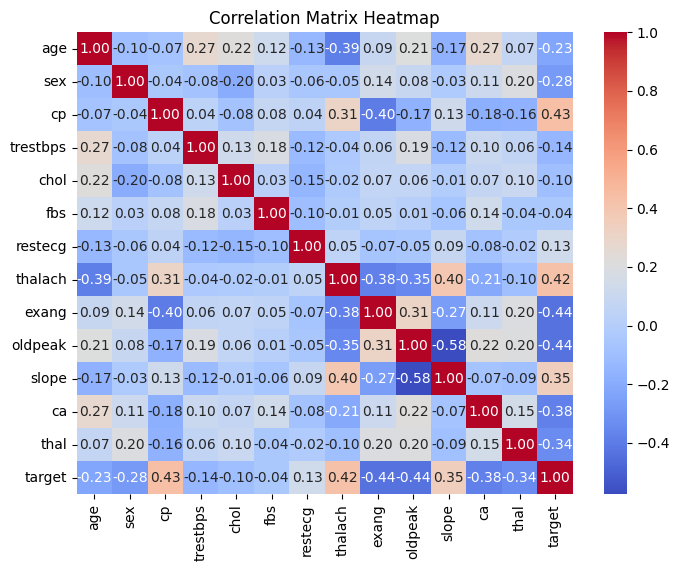

In [18]:
# corr plot to see if any variables are significant in the data set
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Key Takeaways from Visualization:
- There is a variety of ages in our sample, youngest being 30 and the oldest high 70s, however the majority of our sample is 50+
- A majority of patients experienced typical angina (exercising chest pain), the second most frequent was non-anginal pain
-Over half the sample has heart disease, but over half the sample does not have chest pain not related to exercise
- The variables with the highest correlation to "target" (the patient being diagnosed with heart disease or not) are chest pains (cp) and maximum heart rate (thalach). 

In [ ]:
# Import scikit learn packages to use

%pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Since the result I want the ML model to classify is dichotomous (only two options, either has heart disease or does not), I will use a logistic regression model to predict this. The test features (variables I would like to start with) will be chest pains, maximum heart rate, slope and resting ECG to start. Below, I am splitting the data, assigning independent variables, and training the model.

In [20]:
# splitting the data into test features 
feature_columns = ['cp', 'thalach', 'slope', 'restecg']
X = df[feature_columns]
y = df.target

# splitting data for testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# model development and prediction
log_reg = LogisticRegression(random_state=16)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

Now I will test the accuracy of the model below using a confusion matrix. The array's diagonal values (88 and 100) are the accurate predictions and 42 and 27 are the inaccurate predictions. Overall, it appears the model is for the most part accurate. 

Text(0.5, 427.9555555555555, 'Predicted label')

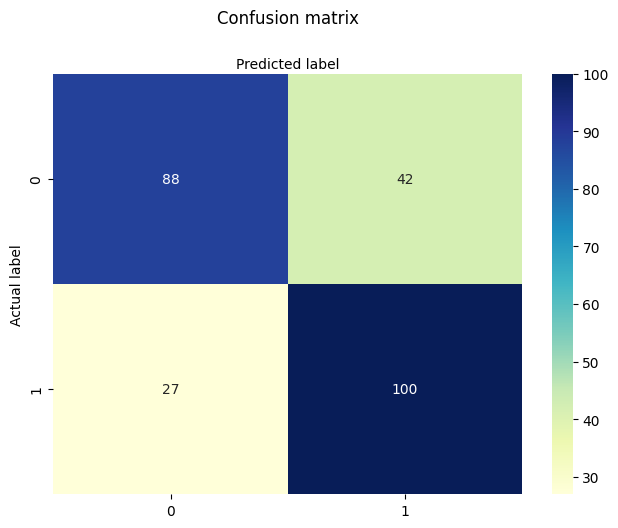

In [25]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#visualize the confusion matrix

import numpy as np

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [26]:
# evaluate the accuracy of the predictions 
from sklearn.metrics import classification_report
target_names = ['normal heart', 'has heart disease']
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     normal heart       0.77      0.68      0.72       130
has heart disease       0.70      0.79      0.74       127

         accuracy                           0.73       257
        macro avg       0.73      0.73      0.73       257
     weighted avg       0.74      0.73      0.73       257



For a first attempt, this is pretty good but I will try adding different variables to see if this improves my accuracy past 73%. 

In [ ]:
# splitting the data into test features 
final_feature_columns = ['cp', 'thalach', 'exang', 'age', 'chol', 'sex', 'trestbps']
X = df[final_feature_columns]
y = df.target

# splitting data for testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# model development and prediction
log_reg = LogisticRegression(random_state=16)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

Text(0.5, 427.9555555555555, 'Predicted label')

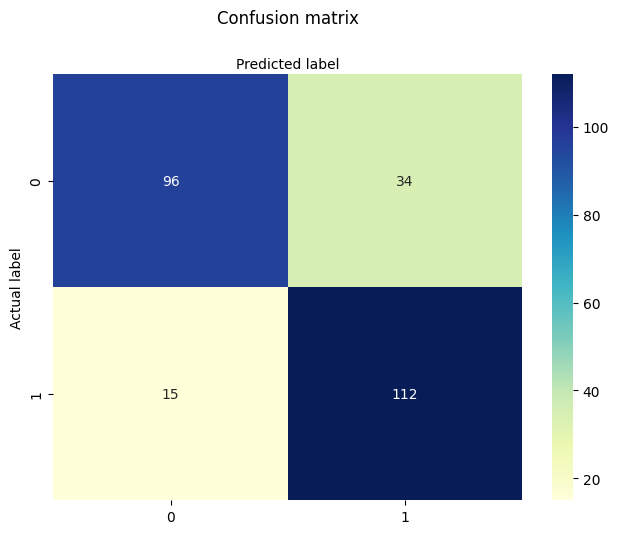

In [55]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#visualize the confusion matrix

import numpy as np

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [56]:
# evaluate the accuracy of the predictions 
from sklearn.metrics import classification_report
target_names = ['normal heart', 'has heart disease']
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     normal heart       0.86      0.74      0.80       130
has heart disease       0.77      0.88      0.82       127

         accuracy                           0.81       257
        macro avg       0.82      0.81      0.81       257
     weighted avg       0.82      0.81      0.81       257



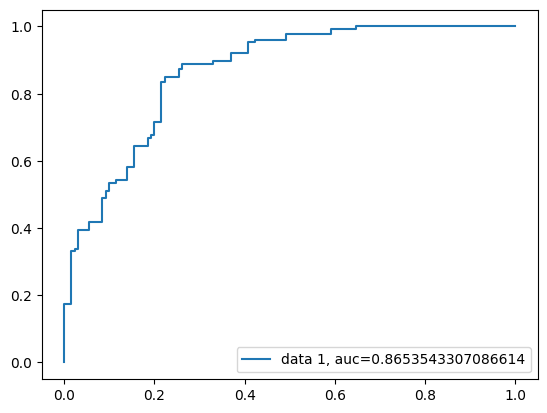

In [58]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

My final model uses the features chest pain type, maximum resting heart rate, exercise-induced engina (whether the patient experiences it or not), age, cholesterol level, sex, and resting blood pressure to achieve the model being accurate 82% of the time. If there are patients in the dataset who have heart disease, this model can identify it 81% of the time. Per datacamp.org, "Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.". My AUC score of .86 (1 being a perfect classifier, .5 being a completely inaccurate one) is overall good. 